In [10]:
import pandas as pd
import numpy as np

In [26]:
# CONFIG

OUT_PATH = "../Playoffs/HP"

import os
os.makedirs(OUT_PATH, exist_ok=True)

In [27]:
# Load the dataset
df = pd.read_excel('../Data/hp.xlsx')

# Parse Score into numeric columns
df[['Score1', 'Score2']] = df['Score'].str.split('-', expand=True).astype(int)

# Compute points per hill for each team
df['Points1'] = df.groupby(['Date','Map','Team1','Team2'])['Score1'].diff().fillna(df['Score1'])
df['Points2'] = df.groupby(['Date','Map','Team1','Team2'])['Score2'].diff().fillna(df['Score2'])

# Keep the original row order in a column
df = df.reset_index().rename(columns={'index':'OrigRow'})

# Filter for relevant teams
relevant_teams = ['Q9', 'OUG', 'SPG', 'XROCK', 'GodL', 'Wolves']

df_masters = df[df['Team1'].isin(relevant_teams) | df['Team2'].isin(relevant_teams)].copy()

# Prepare long format for points
long_pts = pd.concat([
    df_masters[['Map','Hill','Team1','Points1']].rename(columns={'Team1':'Team','Points1':'Points'}),
    df_masters[['Map','Hill','Team2','Points2']].rename(columns={'Team2':'Team','Points2':'Points'})
])

long_pts.head()

,Map,Hill,Team,Points
0,Summit,P1,OUG,13.0
1,Summit,P2,OUG,18.0
2,Summit,P3,OUG,39.0
3,Summit,P4,OUG,19.0
4,Summit,P1,OUG,7.0


In [34]:
oug_hac = df[(df['Date'] == '2025-09-11') & (df['Map'] == 'Hacienda')].reset_index(drop=True) 
oug_hac['OrigRow'] = np.arange(len(oug_hac)) + 1
oug_combine = df[(df['Date'] == '2025-09-11') & (df['Map'] == 'Combine')].reset_index(drop=True)
oug_combine['OrigRow'] = np.arange(len(oug_combine)) + 1

oug_hac.to_csv(f"{OUT_PATH}/oug_hac.csv", index=False)
oug_combine.to_csv(f"{OUT_PATH}/oug_combine.csv", index=False)
# # Plot Score 1 vs. Score 2
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.scatter(oug_hac.index, oug_hac['Score1'], alpha=0.7)
# plt.scatter(oug_hac.index, oug_hac['Score2'], alpha=0.7)
# plt.plot(oug_hac.index, oug_hac['Score1'], label='Q9', color='blue')
# plt.plot(oug_hac.index, oug_hac['Score2'], label='OUG', color='orange')
# plt.xlabel('Hill')
# plt.ylabel('Score')
# plt.title('Score Progression for Q9 vs OUG on Hacienda')
# plt.grid(alpha=0.3)
# plt.legend()

In [33]:
oug_hac

,OrigRow,Date,League,Map,Team1,Team2,Hill,RotateFirst,RotationWin,HoldDuration,...,BreakSuccess,BreakDuration,PossessionChanges,ScrapTeam,ScrapTime,Score,Score1,Score2,Points1,Points2
0,1,2025-09-11,CDM,Hacienda,Q9,OUG,P1,OUG,No,3,...,No,1,6,Q9,8,27-16,27,16,27.0,16.0
1,2,2025-09-11,CDM,Hacienda,Q9,OUG,P2,OUG,No,1,...,No,8,6,Q9,9,51-33,51,33,24.0,17.0
2,3,2025-09-11,CDM,Hacienda,Q9,OUG,P3,OUG,Yes,36,...,No,8,1,Q9,5,59-69,59,69,8.0,36.0
3,4,2025-09-11,CDM,Hacienda,Q9,OUG,P4,OUG,Yes,17,...,Yes,18,1,OUG,3,77-89,77,89,18.0,20.0
4,5,2025-09-11,CDM,Hacienda,Q9,OUG,P1,OUG,No,8,...,No,7,3,Q9,6,100-101,100,101,23.0,12.0
5,6,2025-09-11,CDM,Hacienda,Q9,OUG,P2,OUG,No,12,...,No,9,3,Q9,10,131-114,131,114,31.0,13.0
6,7,2025-09-11,CDM,Hacienda,Q9,OUG,P3,Q9,No,1,...,No,2,5,OUG,3,142-124,142,124,11.0,10.0
7,8,2025-09-11,CDM,Hacienda,Q9,OUG,P4,Q9,Yes,15,...,Yes,15,2,Q9,4,167-139,167,139,25.0,15.0
8,9,2025-09-11,CDM,Hacienda,Q9,OUG,P1,Q9,No,6,...,No,2,4,OUG,3,182-154,182,154,15.0,15.0
9,10,2025-09-11,CDM,Hacienda,Q9,OUG,P2,OUG,No,14,...,No,1,5,Q9,10,210-170,210,170,28.0,16.0


## Team-Level Stats

In [9]:
# List of all teams
teams = sorted(set(long_pts['Team']))

# Team-level stats
team_stats = []

for team in teams:
    played = df_masters[(df_masters['Team1']==team) | (df_masters['Team2']==team)]
    # Rotation-win %
    rf = played[played['RotateFirst']==team]
    rot_first = len(rf) / len(played) * 100 if len(played)>0 else np.nan
    rot_rate = (rf['RotationWin']=='Yes').mean() * 100 if not rf.empty else np.nan
    # Break-success %
    opp = played[played['RotateFirst']!=team]
    breaks = played[(played['BreakTeam']==team) & (played['BreakSuccess']=='Yes')]
    break_rate = len(breaks) / len(opp) * 100 if len(opp)>0 else np.nan
    # Avg durations
    avg_hold = rf['HoldDuration'].mean()
    avg_break_hold = played[played['BreakTeam']==team]['BreakDuration'].mean()
    # Scrap points
    scrap_pts = df_masters[df_masters['ScrapTeam']==team]['ScrapTime'].sum()
    # Control-Share%
    
    team_stats.append({
        'Team': team,
        'RotateFirst': rot_first,
        'RotationWin': rot_rate,
        'BreakSuccess': break_rate,
        'AvgHoldDuration (s)': avg_hold,
        'AvgBreakDuration (s)': avg_break_hold,
        'ScrapPoints': scrap_pts,
    })

team_stats_df = pd.DataFrame(team_stats).set_index('Team')
team_stats_df = team_stats_df.reindex(relevant_teams)
display(team_stats_df)

,RotateFirst,RotationWin,BreakSuccess,AvgHoldDuration (s),AvgBreakDuration (s),ScrapPoints
Team,,,,,,
Q9,45.161290,42.857143,25.000000,13.035714,10.235294,458
OUG,51.388889,47.297297,40.000000,17.837838,13.285714,499
SPG,51.724138,30.666667,17.142857,11.613333,8.500000,403
XROCK,45.925926,37.096774,21.917808,13.983871,7.821918,398
GodL,57.246377,48.101266,40.677966,15.759494,13.694915,544
Wolves,52.475248,47.169811,47.916667,15.490566,16.458333,494


In [6]:
# Most dominant hills, selecting hills teams have played at least 4 times
hill_stats = long_pts.groupby(['Map','Hill','Team']).agg(
    Games=('Points', 'count'),
    AvgPoints=('Points', 'mean')
).reset_index()
hill_stats = hill_stats[hill_stats['Games'] >= 5]
hill_stats = hill_stats[hill_stats['Team'].isin(relevant_teams)]
hill_stats = hill_stats.sort_values(['Team','AvgPoints'], ascending=[True, False])

# Select top hills per team
top_hills = hill_stats.groupby('Team').head(1)
top_hills['TopHill'] = top_hills['Map'] + ' ' + top_hills['Hill']
top_hills = top_hills[['Team','Map','TopHill','AvgPoints']].reset_index(drop=True)
display(top_hills)

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_77182/1388282193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_hills['TopHill'] = top_hills['Map'] + ' ' + top_hills['Hill']


,Team,Map,TopHill,AvgPoints
0,GodL,Hacienda,Hacienda P3,31.285714
1,OUG,Apocalypse,Apocalypse P4,30.166667
2,Q9,Apocalypse,Apocalypse P2,26.333333
3,SPG,Apocalypse,Apocalypse P3,25.833333
4,Wolves,Summit,Summit P1,31.600000
5,XROCK,Summit,Summit P4,30.500000


In [30]:
top_hills.to_csv(f"{OUT_PATH}/TopHills.csv")

In [7]:
team_hill_means = long_pts.groupby(['Team', 'Map', 'Hill'])['Points'].mean().reset_index()
top_hills = (
    team_hill_means
    .sort_values(['Team', 'Points'], ascending=[True, False])
    .groupby('Team', as_index=False)
    .first()
)
top_hills['TopHill'] = top_hills['Map'] + ' ' + top_hills['Hill']
top_hills = top_hills[['Team', 'TopHill', 'Points']].rename(columns={'Points': 'TopHillAvgPts'})


In [8]:
# merge team stats with top hills
team_stats_df = team_stats_df.merge(top_hills, on='Team', how='left')

# Calculate distance from begin perfect at rotation-win and break-success
team_stats_df['RotBreakDist'] = np.sqrt((team_stats_df['RotationWin'] - 100)**2 + (team_stats_df['BreakSuccess'] - 100)**2)
team_stats_df = team_stats_df.sort_values('RotBreakDist')
team_stats_df = team_stats_df.drop(columns='RotBreakDist')

### Control Share

In [9]:
# Assume each hill is 60 seconds long
HILL_LENGTH = 60  

# Build a per-team tally of "seconds in control"
records = []

for _, row in df_masters.iterrows():
    # 1) Rotation-first holds
    records.append({
        'Team': row['RotateFirst'],
        'ControlSec': row['HoldDuration']
    })
    # 2) Break holds (only if break succeeded)
    records.append({
        'Team': row['BreakTeam'],
        'ControlSec': row['BreakDuration']
    })
    # 3) Scrap holds
    if (row['ScrapTeam'] != 'None') and (row['ScrapTime'] > 0):
        if row['ScrapTeam'] == 'Split':
            # Split means both teams control the scrap
            records.append({
                'Team': row['Team1'],
                'ControlSec': row['ScrapTime']
            })
            records.append({
                'Team': row['Team2'],
                'ControlSec': row['ScrapTime']
            })
        else:
            # Single team controls the scrap
            records.append({
                'Team': row['ScrapTeam'],
                'ControlSec': row['ScrapTime']
        })

control_df = pd.DataFrame(records)

# Sum total seconds each team was in control
total_control = control_df.groupby('Team')['ControlSec'].sum()

hills_per_team = pd.concat([df_masters['Team1'], df_masters['Team2']]).value_counts()
total_seconds_per_team = hills_per_team * HILL_LENGTH

# Align and compute control-share % per team
control_share = (total_control / total_seconds_per_team * 100).reset_index()
control_share.columns = ['Team', 'ControlSharePct']

# Sort by control share
control_share = control_share.sort_values('ControlSharePct', ascending=False)

In [10]:
team_stats_df = team_stats_df.merge(control_share, on='Team', how='left')
team_stats_df

,Team,RotationWin,BreakSuccess,AvgHoldDuration (s),AvgBreakDuration (s),ScrapPoints,TopHill,TopHillAvgPts,ControlSharePct
0,Wolves,47.169811,47.916667,15.490566,16.458333,494,Slums P2,44.000000,35.049505
1,OUG,47.297297,40.298507,17.837838,13.402985,493,Slums P3,36.500000,32.198582
2,GodL,48.148148,34.782609,16.055556,12.565217,394,Combine P4,32.500000,30.816667
3,XC,66.666667,14.285714,20.666667,6.714286,18,Apocalypse P2,17.333333,21.666667
4,Q9,43.396226,25.000000,13.264151,10.235294,448,Hacienda P3,38.000000,25.936639
5,XROCK,37.096774,21.917808,13.983871,7.821918,398,Summit P4,30.500000,23.037037
6,SPG,29.687500,18.000000,11.656250,8.800000,296,Slums P1,34.000000,22.032164
7,Soul,30.000000,16.666667,15.700000,10.083333,44,Combine P4,23.750000,24.545455
8,XLR8,20.000000,16.666667,11.800000,7.666667,27,Hacienda P2,33.000000,20.000000
9,WL,17.647059,17.647059,8.705882,7.470588,85,Slums P2,29.500000,17.745098


### Zero-Point Shutouts

In [11]:
rows = []
for _, r in df.iterrows():
    pts1 = r['Points1']
    pts2 = r['Points2']

    if pts1 == 0:
        rows.append({
            'DominantTeam':     r['Team2'],
            'ZeroScoreTeam':    r['Team1'],
            'Map':              r['Map'],
            'Hill':             r['Hill'],
            'ZeroScoreDuration': r['HoldDuration']
        })
    elif pts2 == 0:
        rows.append({
            'DominantTeam':  r['Team1'],
            'ZeroScoreTeam': r['Team2'],
            'Map':           r['Map'],
            'Hill':          r['Hill'],
            'ZeroScoreDuration': r['HoldDuration']
        })

shutouts = pd.DataFrame(rows)

# Filter for relevant teams
shutouts = shutouts[
    shutouts['ZeroScoreTeam'].isin(relevant_teams) &
    shutouts['DominantTeam'].isin(relevant_teams)
]
shutouts = shutouts.sort_values('ZeroScoreDuration', ascending=False, ignore_index=True)
shutouts[:5]


,DominantTeam,ZeroScoreTeam,Map,Hill,ZeroScoreDuration
0,Wolves,OUG,Apocalypse,P4,58
1,XROCK,Q9,Summit,P4,57
2,Wolves,Q9,Slums,P2,56
3,OUG,Q9,Apocalypse,P2,55
4,SPG,XROCK,Summit,P3,53


### Chained-Hills: Momentum Swings

In [12]:
# Build two mini-frames and concat
left = df_masters[['OrigRow','Map','Hill','Team1','Points1','Team2']].rename(
    columns={'Team1':'Team','Points1':'Points','Team2':'Opponent'}
)
right = df_masters[['OrigRow','Map','Hill','Team2','Points2','Team1']].rename(
    columns={'Team2':'Team','Points2':'Points','Team1':'Opponent'}
)
long = pd.concat([left, right], ignore_index=True)

# Sort by match and original play order
long = long.sort_values(['OrigRow'])

# Compute rolling sum of the last 3 hills *per team within each match*
long['Chain4'] = (
    long
      .groupby(['Map','Opponent','Team'])['Points']
      .rolling(window=3, min_periods=3)
      .sum()
      .reset_index(level=[0,1,2], drop=True)
)

# 5) For each team, find the row with its maximum Chain4
best_idx = long.groupby('Team')['Chain4'].idxmax()

# 6) Construct final table including which hills were chained
records = []
for team, i in best_idx.items():
    r = long.loc[i]
    grp = long[
        (long['Team']==team) &
        (long['Map']==r['Map']) &
        (long['Opponent']==r['Opponent'])
    ].sort_values('OrigRow')
    pos = grp.index.get_loc(i)
    hills = grp.iloc[pos-3+1:pos+1]['Hill'].tolist()
    records.append({
        'Team': team,
        'Map': r['Map'],
        'Opponent': r['Opponent'],
        f'Best{3}HillSum': r['Chain4'],
        'Hills': hills
    })

best_chains = pd.DataFrame(records)

# Filter for relevant teams
best_chains = best_chains[
    best_chains['Team'].isin(relevant_teams) &
    best_chains['Opponent'].isin(relevant_teams)
]

best_chains = best_chains.sort_values('Best3HillSum', ascending=False, ignore_index=True)
print(best_chains)

     Team       Map Opponent  Best3HillSum         Hills
0  Wolves     Slums       Q9         137.0  [P2, P3, P4]
1    GodL    Summit      SPG         121.0  [P2, P3, P4]
2     SPG  Hacienda    XROCK         112.0  [P2, P3, P4]


In [13]:
# Map-level stats
# 2. Mixiest hills (avg PossessionChanges)
mixiest = df_masters.groupby(['Map','Hill'])['PossessionChanges'].mean().reset_index()
mixiest = mixiest.sort_values(by='PossessionChanges', ascending=False, ignore_index=True).rename(columns={'PossessionChanges':'AvgPossessionChanges'})
mixiest.head(5)

,Map,Hill,AvgPossessionChanges
0,Summit,P2,3.366667
1,Summit,P1,3.129032
2,Hacienda,P1,3.038462
3,Apocalypse,P1,2.875000
4,Combine,P3,2.764706


In [14]:
# Filter out P1 hills
mixiest_filtered = mixiest[~mixiest['Hill'].str.contains('P1')]
mixiest_filtered.head(5)

,Map,Hill,AvgPossessionChanges
0,Summit,P2,3.366667
4,Combine,P3,2.764706
7,Hacienda,P2,2.636364
8,Summit,P4,2.590909
9,Apocalypse,P3,2.545455


In [14]:
# Save mixiest hills
mixiest.to_csv(f'{OUT_PATH}/mixiest_hills.csv', index=False)

# Save best chains
best_chains.to_csv(f'{OUT_PATH}/best_chains.csv', index=False)

# Save shutouts
shutouts.to_csv(f'{OUT_PATH}/shutouts.csv', index=False)

## Win Predictor Model

In [15]:
rotation_rows = []
for (date, map_, t1, t2), group in df_masters.groupby(['Date', 'Map', 'Team1', 'Team2']):
    # ensure sequential order is preserved
    group = group.reset_index(drop=True)

    # Get scores after first set of hills
    last_row = group[group['Hill'] == 'P4'].head(1)
    if last_row.empty:
        continue

    score1_last = last_row.iloc[0]['Score1']
    score2_last = last_row.iloc[0]['Score2']

    # Determine map winner
    final_row = group[(group['Score1'] == 250) | (group['Score2'] == 250)].head(1)
    if final_row.empty:
        continue

    if final_row.iloc[0]['Score1'] == 250:
        winner = t1
        loser = t2
        target = 1 # from team1's perspective

    else:
        winner = t2
        loser = t1
        target = 0

    # Final Score difference
    if winner == t1:
        score_diff = final_row.iloc[0]['Score1'] - final_row.iloc[0]['Score2']
    else:
        score_diff = final_row.iloc[0]['Score2'] - final_row.iloc[0]['Score1']
    
    rotation_rows.append({
        'Map': map_,
        'Team1': t1,
        'Team2': t2,
        'Score1_P4': score1_last,
        'Score2_P4': score2_last,
        'ScoreDiff_P4': score1_last - score2_last,
        'Winner': winner,
        'Loser': loser,
        'Target_T1': target,
        'FinalScoreDiff': score_diff,
    })

hp_model_df = pd.DataFrame(rotation_rows)


In [16]:
hp_model_df

,Map,Team1,Team2,Score1_P4,Score2_P4,ScoreDiff_P4,Winner,Loser,Target_T1,FinalScoreDiff
0,Combine,Q9,SPG,112,70,42,Q9,SPG,1,106
1,Apocalypse,XROCK,GodL,70,122,-52,GodL,XROCK,0,69
2,Hacienda,GodL,XROCK,115,72,43,GodL,XROCK,1,110
3,Hacienda,SPG,Wolves,66,114,-48,SPG,Wolves,1,41
4,Summit,SPG,Wolves,35,146,-111,Wolves,SPG,0,176
5,Combine,OUG,GodL,90,93,-3,OUG,GodL,1,54
6,Combine,Wolves,Q9,143,35,108,Wolves,Q9,1,115
7,Summit,Q9,Wolves,78,101,-23,Wolves,Q9,0,144
8,Apocalypse,Q9,OUG,106,76,30,OUG,Q9,0,96
9,Combine,Q9,OUG,70,101,-31,OUG,Q9,0,42


In [24]:
godl_v_soul = df_masters[
    ((df_masters['Team1'] == 'GodL') & (df_masters['Team2'] == 'Soul') & (df_masters['Map'] == 'Combine'))
]
godl_v_soul = godl_v_soul[['Team1', 'Team2', 'Score1', 'Score2']]

# Add index column, starting from 1
godl_v_soul = godl_v_soul.reset_index(drop=True, ).reset_index().rename(columns={'index':'HillNum'})
godl_v_soul['HillNum'] += 1
# godl_v_soul
godl_v_soul.to_csv(f"{OUT_PATH}/GodLvSoul_Combine.csv", index=False)

In [16]:
# Calculate match winrate for each team
team_wins = hp_model_df.groupby('Winner').size()
team_total_matches = hp_model_df.groupby('Team1').size() + hp_model_df.groupby('Team2').size()
team_total_matches.dropna(inplace=True)

team_winrate = (team_wins / team_total_matches).reset_index()

display(team_winrate)

,index,0
0,GodL,0.600000
1,OUG,0.800000
2,Q9,0.538462
3,SPG,0.333333
4,Soul,NaN
5,WL,NaN
6,Wolves,0.818182
7,XROCK,0.153846


In [17]:
# Average score difference per winner
avg_score_diff_winner = hp_model_df.groupby('Winner')['FinalScoreDiff'].mean().reset_index()

avg_score_diff_winner = avg_score_diff_winner.rename(columns={'FinalScoreDiff': 'AvgScoreDiff_Winner', 'Winner': 'Team'})

# Average score difference per loser
avg_score_diff_loser = hp_model_df.groupby('Loser')['FinalScoreDiff'].mean().reset_index()
avg_score_diff_loser = avg_score_diff_loser.rename(columns={'FinalScoreDiff': 'AvgScoreDiff_Loser', 'Loser': 'Team'})

# Merge winner and loser averages
avg_score_diff = avg_score_diff_winner.merge(avg_score_diff_loser, on='Team', how='outer').fillna(0)

avg_score_diff['AvgScoreDiff'] = avg_score_diff['AvgScoreDiff_Winner'] - avg_score_diff['AvgScoreDiff_Loser']

avg_score_diff = avg_score_diff[['Team', 'AvgScoreDiff']]

avg_score_diff = avg_score_diff.sort_values('AvgScoreDiff', ascending=False, ignore_index=True)

# team_mask = avg_score_diff['Team'].isin(masters)
# avg_score_diff = avg_score_diff[team_mask]

In [18]:
team_stats_df = team_stats_df.merge(avg_score_diff, on='Team', how='left')

# Filter for relevant teams
team_mask = team_stats_df['Team'].isin(relevant_teams)
team_stats_df = team_stats_df[team_mask]
display(team_stats_df)

,Team,RotationWin,BreakSuccess,AvgHoldDuration (s),AvgBreakDuration (s),ScrapPoints,TopHill,TopHillAvgPts,ControlSharePct,AvgScoreDiff
0,Wolves,47.169811,47.916667,15.490566,16.458333,494,Slums P2,44.0,34.892739,31.444444
1,OUG,47.297297,40.298507,17.837838,13.402985,493,Slums P3,36.5,32.121749,37.250000
2,GodL,48.148148,34.782609,16.055556,12.565217,394,Combine P4,32.5,30.733333,72.333333
4,Q9,43.396226,25.000000,13.264151,10.235294,448,Hacienda P3,38.0,25.688705,-12.714286
5,XROCK,40.000000,21.739130,14.218182,7.884058,366,Summit P4,30.5,22.930108,-58.590909
7,SPG,29.687500,18.000000,11.656250,8.800000,296,Slums P1,34.0,21.849415,-10.250000


In [19]:
team_stats_df.to_csv(f'{OUT_PATH}/team_stats.csv', index=False)

In [41]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import StandardScaler

# ---------- Config ----------
FEATURE = "ScoreDiff_P4"
TARGET  = "Target_T1"
OUT_DIR = "../Week3/HP/win_predictor"
CURVE_POINTS = 201
SEED = 42
N_BOOT = 1000
os.makedirs(OUT_DIR, exist_ok=True)

df = hp_model_df.dropna(subset=[FEATURE, TARGET]).copy()
df[FEATURE] = df[FEATURE].astype(float)
df[TARGET]  = df[TARGET].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(df[[FEATURE]].values)
y = df[TARGET].values

model = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=SEED)
model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
# ---------- Build prediction grid ----------
xmin, xmax = float(df[FEATURE].min()), float(df[FEATURE].max())
pad = max(5.0, 0.1 * (xmax - xmin))
grid = np.linspace(xmin - pad, xmax + pad, CURVE_POINTS).reshape(-1, 1)
grid_scaled = scaler.transform(grid)
p_base = model.predict_proba(grid_scaled)[:, 1]

# ---------- Bootstrap CIs ----------
rng = np.random.default_rng(42)

# Each row = one bootstrap model’s curve over the grid
boot = np.full((N_BOOT, CURVE_POINTS), np.nan, dtype=float)

for i in range(N_BOOT):
    idx = rng.integers(0, len(df), size=len(df))  # sample rows with replacement
    Xb_raw = df[[FEATURE]].values[idx]
    yb     = df[TARGET].values[idx]

    sc = StandardScaler()
    Xb = sc.fit_transform(Xb_raw)
    try:
        m = LogisticRegression(max_iter=1000, solver="lbfgs")
        m.fit(Xb, yb)
        preds = m.predict_proba(sc.transform(grid))[:, 1]  # length = CURVE_POINTS
        boot[i, :] = preds
    except Exception:
        # rare: perfect separation in tiny resamples; leave this row as NaNs
        pass

# 95% CIs across bootstrap runs, per grid point
ci_low  = np.nanpercentile(boot,  2.5, axis=0)   # length = CURVE_POINTS
ci_high = np.nanpercentile(boot, 97.5, axis=0)   # length = CURVE_POINTS

# Sanity check (optional)
assert len(grid.ravel()) == len(p_base) == len(ci_low) == len(ci_high)

curve = pd.DataFrame({
    "ScoreDiff_P4": grid.ravel(),
    "WinProb_Team1": p_base,
    "CI_low": ci_low,
    "CI_high": ci_high
})
# curve.to_csv(os.path.join(OUT_DIR, "hp_curve.csv"), index=False)

print(f"Saved: {os.path.join(OUT_DIR, 'hp_curve.csv')}")

Saved: ../Week3/HP/win_predictor/hp_curve.csv


## Model with Map feature

In [22]:
# Compact, robust Pipeline version: win prob as f(score after P4) by Map
import os
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone

# ------------- Config -------------
FEATURE1 = "ScoreDiff_P4"   # numeric
FEATURE2 = "Map"            # categorical
TARGET   = "Target_T1"      # binary {0,1}
OUT_DIR = "../Week3/HP/win_predictor"
CURVE_POINTS = 201
SEED = 42
N_BOOT = 1000
os.makedirs(OUT_DIR, exist_ok=True)
rng = np.random.default_rng(SEED)

# ------------- Data -------------
df = hp_model_df.dropna(subset=[FEATURE1, FEATURE2, TARGET]).copy()
df[FEATURE1] = df[FEATURE1].astype(float)
df[FEATURE2] = df[FEATURE2].astype("category")
df[TARGET]   = df[TARGET].astype(int)

X = df[[FEATURE1, FEATURE2]]
y = df[TARGET].values

# LOCK categories globally (order is fixed; first is baseline when drop='first')
maps = df[FEATURE2].cat.categories.tolist()
locked_categories = [maps]  # One list per encoded column
# ------------- Pipeline -------------
numeric_features = [FEATURE1]
categorical_features = [FEATURE2]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(categories=locked_categories, drop="first", handle_unknown="ignore"), categorical_features)
    ],
    remainder="drop"
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, solver="lbfgs", random_state=SEED)),
])

pipe.fit(X, y)

# ------------- Build prediction grid (score x map) -------------
xmin, xmax = float(df[FEATURE1].min()), float(df[FEATURE1].max())
pad = max(5.0, 0.1 * (xmax - xmin))
grid_scores = np.linspace(xmin - pad, xmax + pad, CURVE_POINTS)

maps = df[FEATURE2].cat.categories.tolist()  # fixed order
grid_df = pd.DataFrame(
    [(s, m) for m in maps for s in grid_scores],
    columns=[FEATURE1, FEATURE2]
)

# Base predictions
p_base = pipe.predict_proba(grid_df)[:, 1]

# ------------- Bootstrap CIs (refit full pipeline each resample) -------------
boot = np.full((N_BOOT, len(grid_df)), np.nan, dtype=float)

for i in range(N_BOOT):
    idx = rng.integers(0, len(df), size=len(df))
    Xb = X.iloc[idx]
    yb = y[idx]
    try:
        m = clone(pipe)             # fresh clone to avoid leakage
        m.fit(Xb, yb)               # fits scaler + OHE + logistic on resample
        boot[i, :] = m.predict_proba(grid_df)[:, 1]  # same grid; encoder handles categories
    except Exception:
        # In rare perfect-separation cases, leave row as NaNs
        pass

ci_low  = np.nanpercentile(boot,  2.5, axis=0)
ci_high = np.nanpercentile(boot, 97.5, axis=0)

# ------------- Assemble curve table -------------
curve = grid_df.copy()
curve["WinProb_Team1"] = p_base
curve["CI_low"] = ci_low
curve["CI_high"] = ci_high

# Sanity check
expected = CURVE_POINTS * len(maps)
assert len(curve) == expected == len(p_base) == len(ci_low) == len(ci_high)

# ------------- Save -------------
out_path = os.path.join(OUT_DIR, "hp_curve_by_map_pipeline.csv")
curve.to_csv(out_path, index=False)
print(f"Saved: {out_path}")

Saved: ../Week3/HP/win_predictor/hp_curve_by_map_pipeline.csv


In [25]:
# Split `curve` into one file per map
for map_, group in curve.groupby(FEATURE2):
    map_safe = map_.replace(" ", "_").replace("/", "_")
    out_path = os.path.join(OUT_DIR, f"hp_curve_{map_safe}_pipeline.csv")
    group.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")

Saved: ../Week3/HP/win_predictor/hp_curve_Apocalypse_pipeline.csv
Saved: ../Week3/HP/win_predictor/hp_curve_Combine_pipeline.csv
Saved: ../Week3/HP/win_predictor/hp_curve_Hacienda_pipeline.csv
Saved: ../Week3/HP/win_predictor/hp_curve_Slums_pipeline.csv
Saved: ../Week3/HP/win_predictor/hp_curve_Summit_pipeline.csv


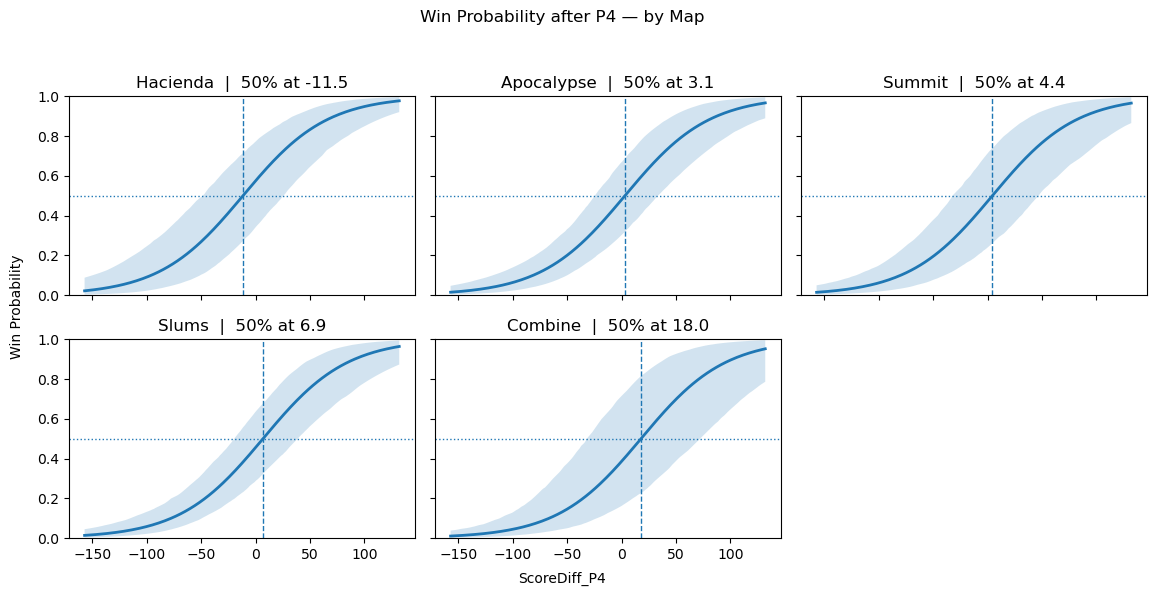

In [24]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

curve = pd.read_csv("../Week3/HP/win_predictor/hp_curve_by_map_pipeline.csv")
maps = curve["Map"].unique().tolist()

def x_at_prob(df_map, target=0.5):
    # linear interpolation for x where p crosses target
    x, p = df_map["ScoreDiff_P4"].values, df_map["WinProb_Team1"].values
    idx = np.searchsorted(p, target)
    if idx == 0 or idx >= len(p):  # no crossing in range
        return np.nan
    # interpolate between (x[idx-1], p[idx-1]) and (x[idx], p[idx])
    p0, p1 = p[idx-1], p[idx]
    x0, x1 = x[idx-1], x[idx]
    if p1 == p0:
        return x0
    return x0 + (target - p0) * (x1 - x0) / (p1 - p0)

# sort panels by crossover (easier scan)
order = []
for m in maps:
    dfm = curve[curve["Map"] == m].sort_values("ScoreDiff_P4")
    order.append((m, x_at_prob(dfm)))
order = [m for m, _ in sorted(order, key=lambda t: (np.isnan(t[1]), t[1]))]

n = len(order)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True, sharey=True)
axes = axes.ravel()

for i, m in enumerate(order):
    ax = axes[i]
    dfm = curve[curve["Map"] == m].sort_values("ScoreDiff_P4")
    x = dfm["ScoreDiff_P4"].values
    p = dfm["WinProb_Team1"].values
    lo = dfm["CI_low"].values
    hi = dfm["CI_high"].values

    ax.plot(x, p, lw=2)
    ax.fill_between(x, lo, hi, alpha=0.2)
    # 50% crossover
    x50 = x_at_prob(dfm)
    if not np.isnan(x50):
        ax.axvline(x50, ls="--", lw=1)
        ax.set_title(f"{m}  |  50% at {x50:.1f}")
    else:
        ax.set_title(f"{m}  |  50% off-scale")

    ax.axhline(0.5, ls=":", lw=1)
    ax.set_ylim(0, 1)

# hide unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Win Probability after P4 — by Map", y=0.995)
fig.text(0.5, 0.04, "ScoreDiff_P4", ha="center")
fig.text(0.04, 0.5, "Win Probability", va="center", rotation="vertical")
plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])
plt.show()


In [26]:
# Save pipeline model
import joblib
model_path = os.path.join(OUT_DIR, "hp_win_model_pipeline.joblib")
joblib.dump(pipe, model_path)
print(f"Saved: {model_path}")

Saved: ../Week3/HP/win_predictor/hp_win_model_pipeline.joblib


In [48]:
# ---------- Cross-validated metrics ----------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
aucs, briers = [], []
for tr, te in skf.split(X, y):
    m = LogisticRegression(max_iter=1000, solver="lbfgs", random_state=SEED)
    m.fit(X[tr], y[tr])
    p = m.predict_proba(X[te])[:, 1]
    aucs.append(roc_auc_score(y[te], p))
    briers.append(brier_score_loss(y[te], p))

metrics = {
    "n_matches": int(len(df)),
    "AUC_mean": float(np.mean(aucs)),
    "AUC_std": float(np.std(aucs)),
    "Brier_mean": float(np.mean(briers)),
    "Brier_std": float(np.std(briers)),
}
pd.DataFrame([metrics]).to_csv(os.path.join(OUT_DIR, "metrics_cv.csv"), index=False)